# Get the Data 

In [1]:
import pandas as pd 
data = pd.read_csv("../data/data_3_range.csv", header=None, names=["secenek", "cinsiyet", "sidmalzememarka", "UrunGrubu", "ResimAdresi", "YakaTipi", 
                                                            "CepOzelligi", "KolBoyuAciklama", "resimSira"])
data.head() 

,secenek,cinsiyet,sidmalzememarka,UrunGrubu,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama,resimSira
1,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,3
2,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,1
3,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,2
4,G021GL004.000.1011907.VR036,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1
5,G021GL004.000.1012040.VR003,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1


In [2]:
data_img = data[["secenek","ResimAdresi", "YakaTipi", "CepOzelligi", "KolBoyuAciklama"]]
data_img.head() 

,secenek,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama
1,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
2,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
3,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
4,G021GL004.000.1011907.VR036,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL
5,G021GL004.000.1012040.VR003,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL


In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    data_img.iloc[:, :2],
    data_img.iloc[:, 2:],
    test_size=0.25, 
    random_state=42
)

X_train.shape, X_test.shape 

((3390, 2), (1131, 2))

In [4]:
y_train["YakaTipi"].value_counts() 

DÜĞMELI YAKA     1598
BISIKLET YAKA     782
KAPIŞONLU         524
POLO YAKA         486
Name: YakaTipi, dtype: int64

In [5]:
y_train["CepOzelligi"].value_counts() 

CEPSIZ         2495
TEK CEP         325
ÇIFT CEP        289
KANGURU CEP     281
Name: CepOzelligi, dtype: int64

In [6]:
y_train["KolBoyuAciklama"].value_counts() 

UZUN KOL    2622
KISA KOL     768
Name: KolBoyuAciklama, dtype: int64

# Download Data 

In [7]:
import cv2 
import os 
import requests 
import numpy as np 

def save_image_cv(url, scale_percent, path, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = size 
    
    output = cv2.resize(image, dsize)
    # output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) it is already in RGB Format 

    return cv2.imwrite(path, output)


def make_dataset_cv(dataset_name, datasource, iteration = None, set_name="train"):
    problems_rows = []
    iterator = 0 
    try:
        base = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
        path = os.path.join('data', dataset_name)
        path = os.path.join(base, path)
        if not os.path.isdir(path):
            os.mkdir(path)
        
        # ../data/dataset_name/
        
        folder_set = os.path.join(path, set_name) 
        os.mkdir(folder_set) 
    
        for img_index, img_row in datasource.iterrows():
                try:
                    # tmp = os.path.join(path, img_row["partition"])
                    # data / dataset / train - test / 
                    #tmp = os.path.join(folder_set, "class_" + str(img_row["class"])) 
                    #if not os.path.isdir(tmp): 
                        #os.mkdir(tmp) 
                    
                    if save_image_cv(img_row['ResimAdresi'], 75, os.path.join(folder_set, str(img_index) + '.png'), size=(224, 224)) == False:
                        problems_rows.append(img_row)

                    if iteration is not None and iterator == iteration:
                        break
                    else:
                        iterator+=1
                        if iterator % 1000 == 0: 
                            print(f"Iteration {iterator}") 
                            
                except Exception as e2:
                    problems_rows.append(img_row)
                    print(e2)
                    continue
    except Exception as e:
        print('An exception occurred.', e)
    return problems_rows

In [8]:
# errors_train = make_dataset_cv(
#      dataset_name = "range_3_images_AYD", 
#      datasource = X_train
# )

In [9]:
# errors_train

In [10]:
# errors_test = make_dataset_cv(
#     dataset_name = "range_3_images_AYD", 
#     datasource = X_test,
#     set_name="test"
# ) 

In [11]:
# errors_test

-Name: 945
-Name: 745
-Name: 898

In [12]:
X_test[X_test.index == 945]

,secenek,ResimAdresi
945,G021GL004.000.989158.VR013,https://resim.aydinli.com.tr/So/t/are/est\02\1...


In [13]:
y_test[y_test.index ==945]

,YakaTipi,CepOzelligi,KolBoyuAciklama
945,DÜĞMELI YAKA,CEPSIZ,UZUN KOL


In [14]:
X_test[X_test.index == 745]

,secenek,ResimAdresi
745,G021GL004.000.861939.VR046,https://resim.aydinli.com.tr/So/t/are/est\02\1...


In [15]:
X_test.drop(index=[898, 745, 945], inplace=True) 
y_test.drop(index=[898, 745, 945], inplace=True) 

In [16]:
X_train.shape, y_train.shape 

((3390, 2), (3390, 3))

In [17]:
X_test.shape, y_test.shape 

((1128, 2), (1128, 3))

In [18]:
import os 
X_train["paths"] = X_train.index.copy() 
X_train["paths"] = X_train["paths"].apply(lambda x: os.path.join("../data/range_3_images_AYD/train/",str(x) + '.png')) 

X_test["paths"] = X_test.index.copy() 
X_test["paths"] = X_test["paths"].apply(lambda x: os.path.join("../data/range_3_images_AYD/test/",str(x) + '.png')) 

In [19]:
X_test.head() 

,secenek,ResimAdresi,paths
2399,G081SZ004.000.744736.VR033,https://resim.aydinli.com.tr/08/1/004/S5019939...,../data/range_3_images_AYD/test/2399.png
801,G021GL004.000.880117.VR033,https://resim.aydinli.com.tr/02/1/004/S5021118...,../data/range_3_images_AYD/test/801.png
2289,G081GL082.000.851615.VR046,https://resim.aydinli.com.tr/08/1/082/S5020865...,../data/range_3_images_AYD/test/2289.png
2345,G081SZ004.000.1098327.VR006,https://resim.aydinli.com.tr/08/1/004/S5022635...,../data/range_3_images_AYD/test/2345.png
3616,G082SZ011.000.734024.VR054,https://resim.aydinli.com.tr/08/2/011/S5020268...,../data/range_3_images_AYD/test/3616.png


In [20]:
X_train.head() 

,secenek,ResimAdresi,paths
1413,G021SZ004.000.1487525.VR054,https://showroom.aydinli.com.tr/2022K/02/50259...,../data/range_3_images_AYD/train/1413.png
2118,G081GL082.000.1082611.VR014,https://resim.aydinli.com.tr/08/1/082/S5022533...,../data/range_3_images_AYD/train/2118.png
3444,G081SZ082.000.944127.VR177,https://resim.aydinli.com.tr/08/1/082/S5021628...,../data/range_3_images_AYD/train/3444.png
1489,G021SZ004.000.837114.VR033,https://resim.aydinli.com.tr/02/1/004/S5020711...,../data/range_3_images_AYD/train/1489.png
2621,G081SZ011.000.1455103.VR043,https://resim.aydinli.com.tr/08/1/011/S5025321...,../data/range_3_images_AYD/train/2621.png


# Create Keras Data Generators

In [21]:
train_data_flow_df = pd.concat([
    X_train.paths, 
    pd.Series(y_train.values.tolist(), index=y_train.index, name="labels")
], axis=1)

test_data_flow_df = pd.concat([
    X_test.paths, 
    pd.Series(y_test.values.tolist(), index=y_test.index, name="labels") 
], axis=1)

In [22]:
train_data_flow_df

,paths,labels
1413,../data/range_3_images_AYD/train/1413.png,"[DÜĞMELI YAKA, CEPSIZ, UZUN KOL]"
2118,../data/range_3_images_AYD/train/2118.png,"[POLO YAKA, CEPSIZ, UZUN KOL]"
3444,../data/range_3_images_AYD/train/3444.png,"[BISIKLET YAKA, CEPSIZ, UZUN KOL]"
1489,../data/range_3_images_AYD/train/1489.png,"[DÜĞMELI YAKA, CEPSIZ, UZUN KOL]"
2621,../data/range_3_images_AYD/train/2621.png,"[BISIKLET YAKA, CEPSIZ, KISA KOL]"
...,...,...
4427,../data/range_3_images_AYD/train/4427.png,"[POLO YAKA, CEPSIZ, UZUN KOL]"
467,../data/range_3_images_AYD/train/467.png,"[DÜĞMELI YAKA, TEK CEP, UZUN KOL]"
3093,../data/range_3_images_AYD/train/3093.png,"[BISIKLET YAKA, CEPSIZ, UZUN KOL]"
3773,../data/range_3_images_AYD/train/3773.png,"[KAPIŞONLU, KANGURU CEP, UZUN KOL]"


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [24]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

Found 3390 validated image filenames belonging to 10 classes.
Found 1128 validated image filenames belonging to 10 classes.


# Model 0: Efficient Net B0 

In [ ]:
import tensorflow as tf 

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = tf.keras.layers.Dense(10, kernel_initializer=initializer,activation=activation, name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs) 

In [ ]:
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 

In [ ]:
checkpoint_path = "./checkpoints/range3/MODEL_0/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
model_0.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
history_model_0 = model_0.fit(
    train, 
    epochs=10, 
    steps_per_epoch=len(train), 
    validation_data = test,
    callbacks=[checkpoint_callback],
    validation_steps=len(test)
)

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8383 - precision: 0.7648 - recall: 0.6658
Epoch 1: saving model to ./checkpoints/range3/MODEL_0\checkpoint-1.ckpt
106/106 [==============================] - 374s 3s/step - loss: 0.3813 - accuracy: 0.8383 - precision: 0.7648 - recall: 0.6658 - val_loss: 0.2853 - val_accuracy: 0.8855 - val_precision: 0.8421 - val_recall: 0.7612
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.8920 - precision: 0.8534 - recall: 0.7729
Epoch 2: saving model to ./checkpoints/range3/MODEL_0\checkpoint-2.ckpt
106/106 [==============================] - 345s 3s/step - loss: 0.2681 - accuracy: 0.8920 - precision: 0.8534 - recall: 0.7729 - val_loss: 0.2378 - val_accuracy: 0.9056 - val_precision: 0.8720 - val_recall: 0.8032
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9098 - precision: 0.8789 - recall: 0.8110
Epoch 3: saving model to ./ch

<AxesSubplot:>

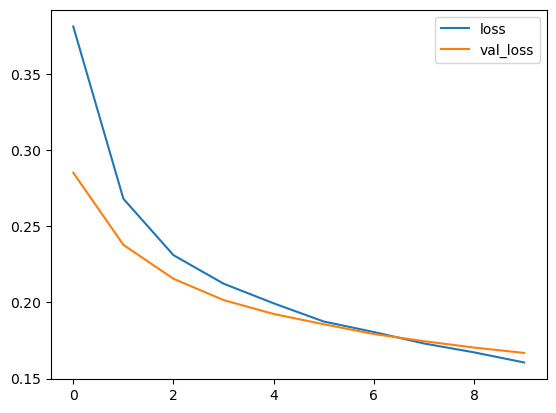

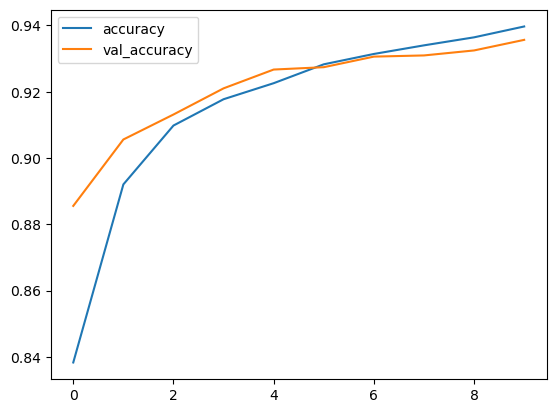

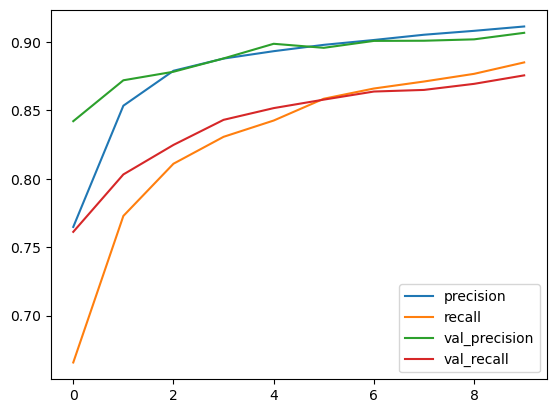

In [ ]:
pd.DataFrame(history_model_0.history)[["loss", "val_loss"]].plot()

pd.DataFrame(history_model_0.history)[["accuracy", "val_accuracy"]].plot()

pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

## Fine Tuning 

In [ ]:
for layer in model_0.layers: 
  print(layer.trainable)

True
True
True
True


In [ ]:
len(base_model.trainable_variables)

0

In [ ]:
base_model.trainable = True 

for layer in base_model.layers[:-10]:
  layer.trainable = False 

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_0_fine = model_0.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_0.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
106/106 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9330 - precision: 0.8942 - recall: 0.8808
Epoch 10: saving model to ./checkpoints/range3/MODEL_0\checkpoint-10.ckpt
106/106 [==============================] - 405s 4s/step - loss: 0.1687 - accuracy: 0.9330 - precision: 0.8942 - recall: 0.8808 - val_loss: 0.1286 - val_accuracy: 0.9484 - val_precision: 0.9220 - val_recall: 0.9046
Epoch 11/15
106/106 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9609 - precision: 0.9388 - recall: 0.9305
Epoch 11: saving model to ./checkpoints/range3/MODEL_0\checkpoint-11.ckpt
106/106 [==============================] - 402s 4s/step - loss: 0.1061 - accuracy: 0.9609 - precision: 0.9388 - recall: 0.9305 - val_loss: 0.1307 - val_accuracy: 0.9488 - val_precision: 0.9201 - val_recall: 0.9084
Epoch 12/15
106/106 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9695 - precision: 0.9527 - recall: 0.9453
Epoch 12: saving model

In [ ]:
import matplotlib.pyplot as plt 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

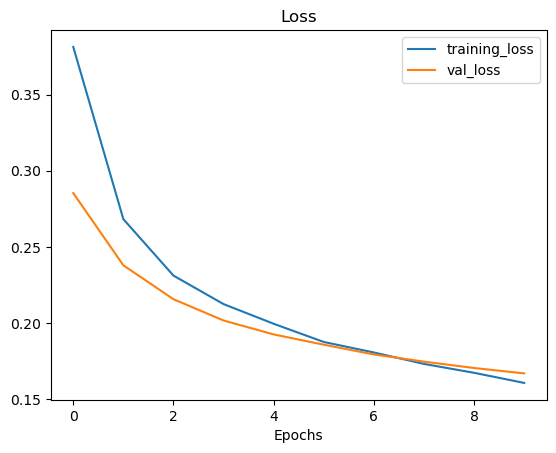

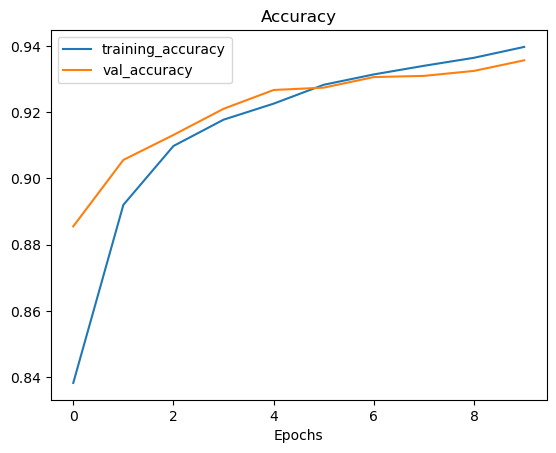

In [ ]:
plot_loss_curves(history_model_0)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

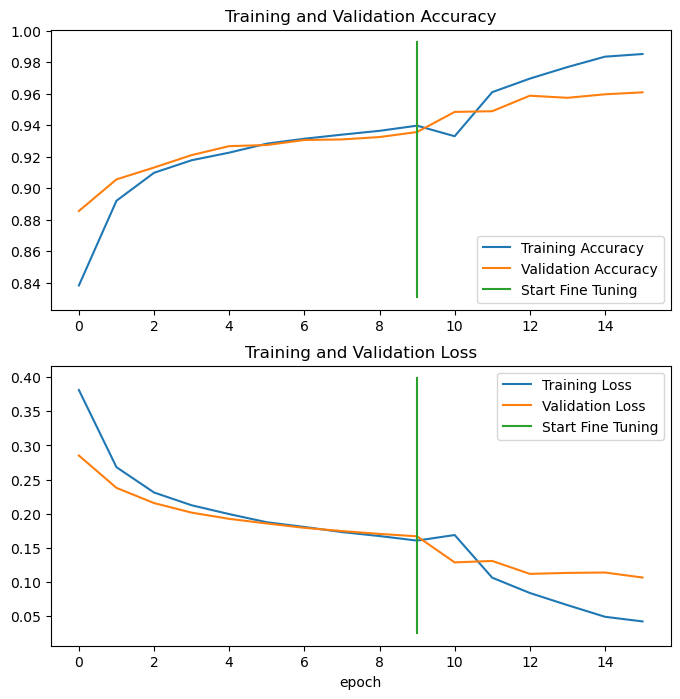

In [ ]:
compare_historys(history_model_0, history_model_0_fine, initial_epochs=10)

<AxesSubplot:>

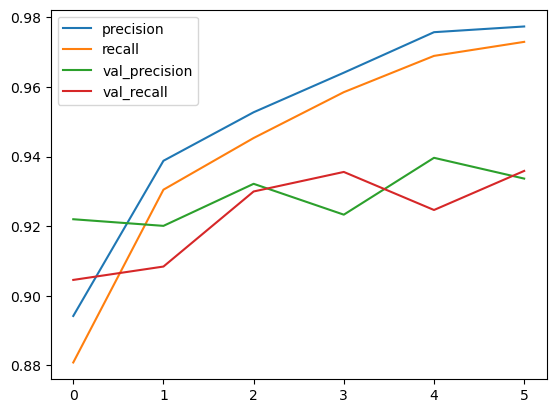

In [ ]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

In [ ]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.894190,0.880826,0.921988,0.904551
1,0.938790,0.930482,0.920084,0.908392
2,0.952730,0.945329,0.932168,0.929965
3,0.964099,0.958505,0.923301,0.935579
4,0.975740,0.968928,0.939640,0.924645
5,0.977380,0.972960,0.933667,0.935875


In [ ]:
pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.764825,0.665782,0.842105,0.761229
1,0.853420,0.772861,0.871992,0.803191
2,0.878943,0.811013,0.878225,0.824764
3,0.887861,0.830678,0.887955,0.843085
4,0.893255,0.842576,0.898659,0.851655
5,0.897882,0.858505,0.895711,0.857861
6,0.901433,0.865978,0.900770,0.863771
7,0.905273,0.871091,0.900893,0.864953
8,0.908128,0.876696,0.901901,0.869385
9,0.911309,0.885054,0.906671,0.875591


In [ ]:
model_0.load_weights("./checkpoints/range3/MODEL_0/checkpoint-12.ckpt") # ckpt 12 load buradayız

In [ ]:
model_0.evaluate(
    test
)

# 14s 642ms/step - loss: 0.1032 - accuracy: 0.9609 - precision: 0.9292 - recall: 0.9415

36/36 [==============================] - 70s 2s/step - loss: 0.1118 - accuracy: 0.9587 - precision: 0.9322 - recall: 0.9300


[0.1117708832025528, 0.958687961101532, 0.9321682453155518, 0.929964542388916]

In [ ]:
model_0.save('../trained_models/efficient_net_model_range3_EPOCH-12.h5')
# model couldn't save ! 

## Prediction 

In [ ]:
input_first = test[0][0][0] 
output_first = test[0][1][0]

In [ ]:
import cv2 
input_first = cv2.resize(input_first,(224,224))     # resize image to match model's expected sizing
input_first = input_first.reshape(1,224,224,3)

In [ ]:
results = model_0.predict(
    input_first
)

1/1 [==============================] - 3s 3s/step


In [ ]:
results[results >= 0.5] = 1 
results[results < 0.5] = 0 

In [ ]:
results

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
output_first

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

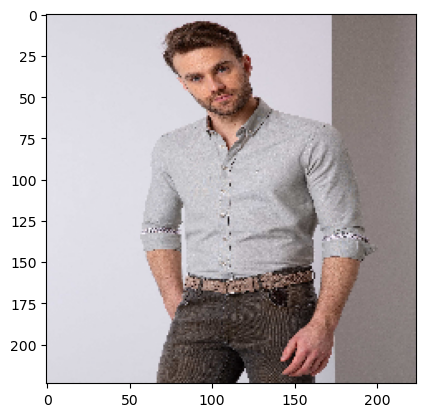

In [ ]:
from matplotlib import pyplot as plt 

plt.imshow(test[0][0][0] / 255.0)

In [ ]:
classes = test.class_indices 
classes

{'BISIKLET YAKA': 0,
 'CEPSIZ': 1,
 'DÜĞMELI YAKA': 2,
 'KANGURU CEP': 3,
 'KAPIŞONLU': 4,
 'KISA KOL': 5,
 'POLO YAKA': 6,
 'TEK CEP': 7,
 'UZUN KOL': 8,
 'ÇIFT CEP': 9}

In [ ]:
import cv2
from matplotlib import pyplot as plt 


def predict_custom(img_input_array, img_labels, model=model_0, threshold=0.5, classes=classes):
    input_x = cv2.resize(img_input_array,(224,224))     # resize image to match model's expected sizing
    input_x = input_x.reshape(1,224,224,3) 

    results = model_0.predict(input_x) 
    results[results >= threshold] = 1 
    results[results < threshold] = 0

    results = pd.DataFrame(
        index=classes.keys(), 
        data=np.column_stack((results.reshape((10,1)), img_labels.reshape((10,1)))),
        columns=["preds", "actuals"] 
    )

    plt.imshow(img_input_array / 255.0)
    plt.show()

    return results   

1/1 [==============================] - 0s 395ms/step


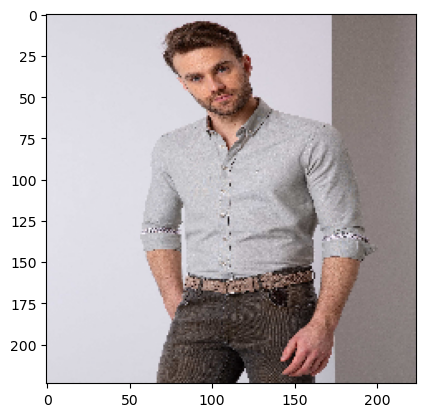

,preds,actuals
BISIKLET YAKA,0.0,0.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,1.0,1.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [ ]:
predict_custom(
    test[0][0][0], 
    test[0][1][0]
)

1/1 [==============================] - 0s 55ms/step


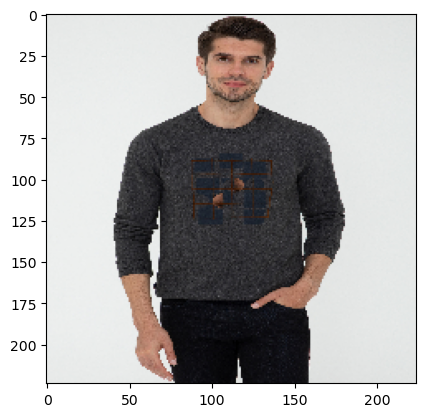

,preds,actuals
BISIKLET YAKA,1.0,1.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,0.0,0.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [ ]:
predict_custom(
    test[0][0][20], 
    test[0][1][20]
)

1/1 [==============================] - 2s 2s/step


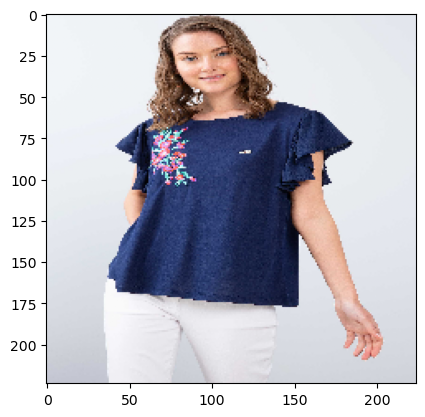

,preds,actuals
BISIKLET YAKA,1.0,1.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,0.0,0.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,1.0,1.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,0.0,0.0
ÇIFT CEP,0.0,0.0


In [ ]:
predict_custom(
    test[10][0][30], 
    test[10][1][30]
)

# Model 1: VGG-16 

In [ ]:
vgg_16 = tf.keras.applications.VGG16(weights="imagenet",input_shape=(224, 224, 3), include_top=False) 
vgg_16.trainable = False 

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3)) 
x = tf.cast(inputs, tf.float32) 
x = tf.keras.applications.vgg16.preprocess_input(x)
x = vgg_16(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid 

outputs = tf.keras.layers.Dense(10,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1 = tf.keras.Model(inputs, outputs) 

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [ ]:
checkpoint_path = "./checkpoints/range3/MODEL_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
history_model_1 = model_1.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.7647 - accuracy: 0.7732 - precision: 0.6308 - recall: 0.5879
Epoch 1: saving model to ./checkpoints/range3/MODEL_1\checkpoint-1.ckpt
106/106 [==============================] - 477s 4s/step - loss: 0.7647 - accuracy: 0.7732 - precision: 0.6308 - recall: 0.5879 - val_loss: 0.4762 - val_accuracy: 0.8263 - val_precision: 0.7244 - val_recall: 0.6797
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8480 - precision: 0.7626 - recall: 0.7164
Epoch 2: saving model to ./checkpoints/range3/MODEL_1\checkpoint-2.ckpt
106/106 [==============================] - 476s 4s/step - loss: 0.3912 - accuracy: 0.8480 - precision: 0.7626 - recall: 0.7164 - val_loss: 0.3469 - val_accuracy: 0.8674 - val_precision: 0.7869 - val_recall: 0.7651
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8809 - precision: 0.8196 - recall: 0.7734
Epoch 3: saving model to ./ch

<AxesSubplot:>

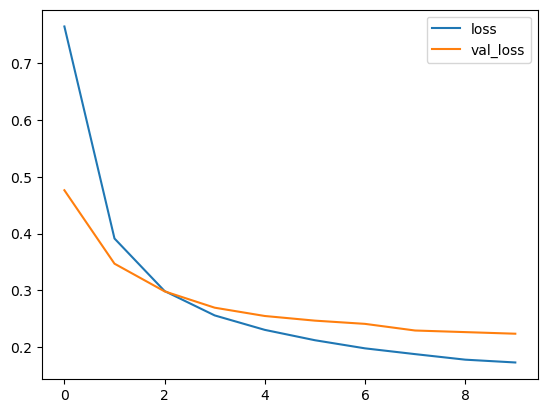

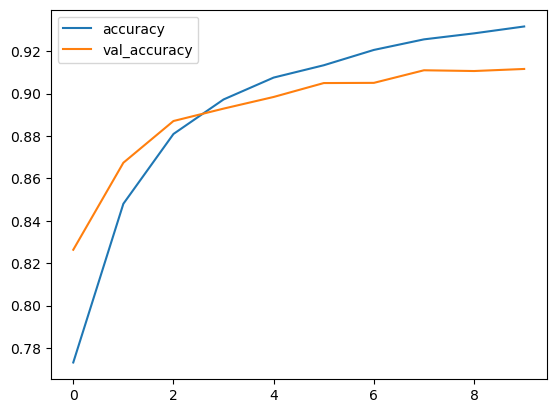

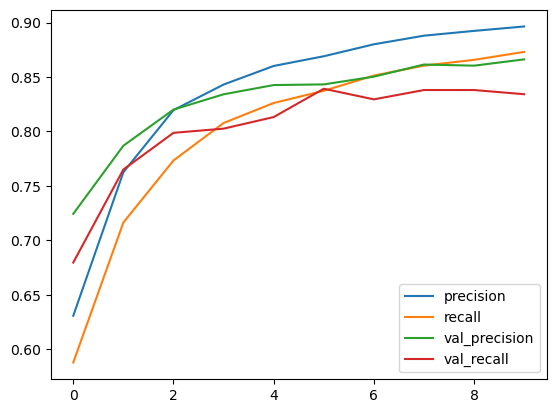

In [ ]:
pd.DataFrame(history_model_1.history)[["loss", "val_loss"]].plot()

pd.DataFrame(history_model_1.history)[["accuracy", "val_accuracy"]].plot()

pd.DataFrame(history_model_1.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

## Fine Tune 

In [ ]:
len(vgg_16.layers)

19

In [ ]:
vgg_16.trainable = True 

for layer in vgg_16.layers[:-10]:
  layer.trainable = False 

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_1_fine = model_0.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_1.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
106/106 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9787 - precision: 0.9670 - recall: 0.9618
Epoch 10: saving model to ./checkpoints/range3/MODEL_2\checkpoint-10.ckpt
106/106 [==============================] - 413s 4s/step - loss: 0.0631 - accuracy: 0.9787 - precision: 0.9670 - recall: 0.9618 - val_loss: 0.1078 - val_accuracy: 0.9581 - val_precision: 0.9375 - val_recall: 0.9217
Epoch 11/15
106/106 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9809 - precision: 0.9712 - recall: 0.9648
Epoch 11: saving model to ./checkpoints/range3/MODEL_2\checkpoint-11.ckpt
106/106 [==============================] - 412s 4s/step - loss: 0.0540 - accuracy: 0.9809 - precision: 0.9712 - recall: 0.9648 - val_loss: 0.1169 - val_accuracy: 0.9591 - val_precision: 0.9385 - val_recall: 0.9243
Epoch 12/15
106/106 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9873 - precision: 0.9806 - recall: 0.9769
Epoch 12: saving model

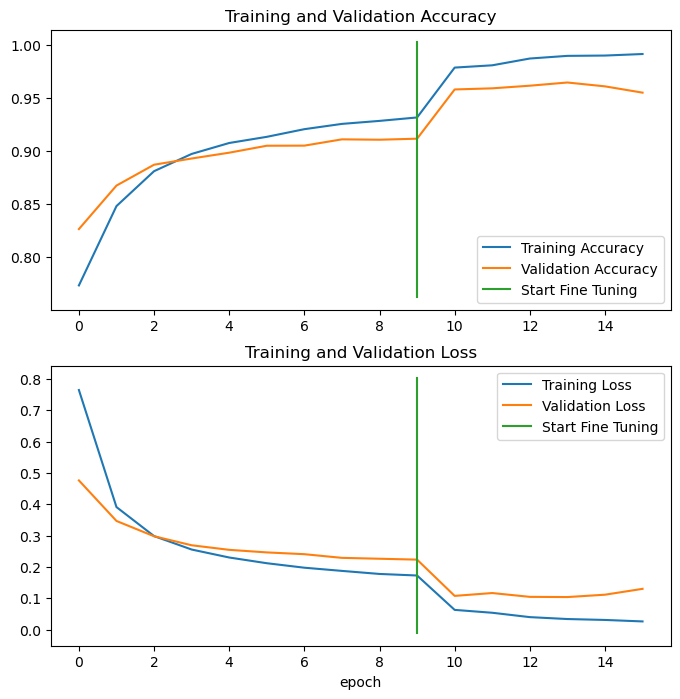

In [ ]:
compare_historys(
   history_model_1,
   history_model_1_fine
)

<AxesSubplot:>

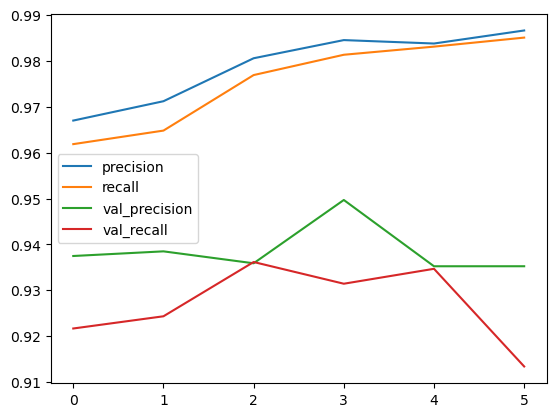

In [ ]:
pd.DataFrame(history_model_1_fine.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

In [ ]:
pd.DataFrame(history_model_1.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.630829,0.587906,0.724409,0.679669
1,0.762613,0.716421,0.786930,0.765071
2,0.819612,0.773353,0.820085,0.798759
3,0.843083,0.807768,0.834152,0.802600
4,0.860156,0.826155,0.842621,0.813239
5,0.869068,0.837365,0.843230,0.839243
6,0.880057,0.851327,0.850348,0.829492
7,0.887976,0.860472,0.861482,0.838061
8,0.892368,0.865782,0.860437,0.838061
9,0.896416,0.873058,0.866217,0.834220


In [ ]:
pd.DataFrame(history_model_1_fine.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.966983,0.961849,0.937481,0.921690
1,0.971197,0.964798,0.938494,0.924350
2,0.980557,0.976893,0.935894,0.936170
3,0.984512,0.981318,0.949684,0.931442
4,0.983765,0.983088,0.935245,0.934693
5,0.986606,0.985054,0.935250,0.913416


## Model 1.1: VGG-16 with Data Augmentation 

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1), 
    tf.keras.layers.RandomBrightness(0.1)
])

In [ ]:
vgg_16_v2 = tf.keras.applications.VGG16(weights="imagenet", input_shape=(224,224, 3), include_top=False) 
vgg_16_v2.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3)) 
x = tf.cast(inputs, tf.float32) 
# x = data_augmentation(x)
x = tf.keras.applications.vgg16.preprocess_input(x) 
x = vgg_16_v2(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid 

outputs = tf.keras.layers.Dense(10,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1_1 = tf.keras.Model(inputs, outputs) 

In [ ]:
model_1_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [ ]:
checkpoint_path = "./checkpoints/range3/MODEL_1_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
history_model_1_1 = model_1_1.fit(train, 
                            epochs=30,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/30
106/106 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.7648 - precision: 0.6103 - recall: 0.5973
Epoch 1: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-1.ckpt
106/106 [==============================] - 487s 5s/step - loss: 0.7609 - accuracy: 0.7648 - precision: 0.6103 - recall: 0.5973 - val_loss: 0.4769 - val_accuracy: 0.8203 - val_precision: 0.7160 - val_recall: 0.6646
Epoch 2/30
106/106 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.8474 - precision: 0.7613 - recall: 0.7159
Epoch 2: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-2.ckpt
106/106 [==============================] - 490s 5s/step - loss: 0.3925 - accuracy: 0.8474 - precision: 0.7613 - recall: 0.7159 - val_loss: 0.3513 - val_accuracy: 0.8662 - val_precision: 0.7973 - val_recall: 0.7429
Epoch 3/30
106/106 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.8783 - precision: 0.8143 - recall: 0.7699
Epoch 3: saving model to 

In [ ]:
vgg_16_v2.trainable =  True 

for layer in vgg_16_v2.layers[:-10]:
  layer.trainable = False 

model_1_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 

# Fine tune for another 5 epochs
fine_tune_epochs = 30 + 20

# Refit the model (same as model_2 except with more trainable layers)
history_model_1_1_fine = model_1_1.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_1_1.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 30/50
106/106 [==============================] - ETA: 0s - loss: 8.1174 - accuracy: 0.6378 - precision: 0.4199 - recall: 0.5440
Epoch 30: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-30.ckpt
106/106 [==============================] - 1105s 10s/step - loss: 8.1174 - accuracy: 0.6378 - precision: 0.4199 - recall: 0.5440 - val_loss: 0.6187 - val_accuracy: 0.6351 - val_precision: 0.4189 - val_recall: 0.5585
Epoch 31/50
106/106 [==============================] - ETA: 0s - loss: 0.6083 - accuracy: 0.6345 - precision: 0.4174 - recall: 0.5513
Epoch 31: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-31.ckpt
106/106 [==============================] - 1122s 11s/step - loss: 0.6083 - accuracy: 0.6345 - precision: 0.4174 - recall: 0.5513 - val_loss: 0.5853 - val_accuracy: 0.6355 - val_precision: 0.4193 - val_recall: 0.5585
Epoch 32/50
106/106 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.6376 - precision: 0.4195 - recall: 0.5415
Epoch 32: savi

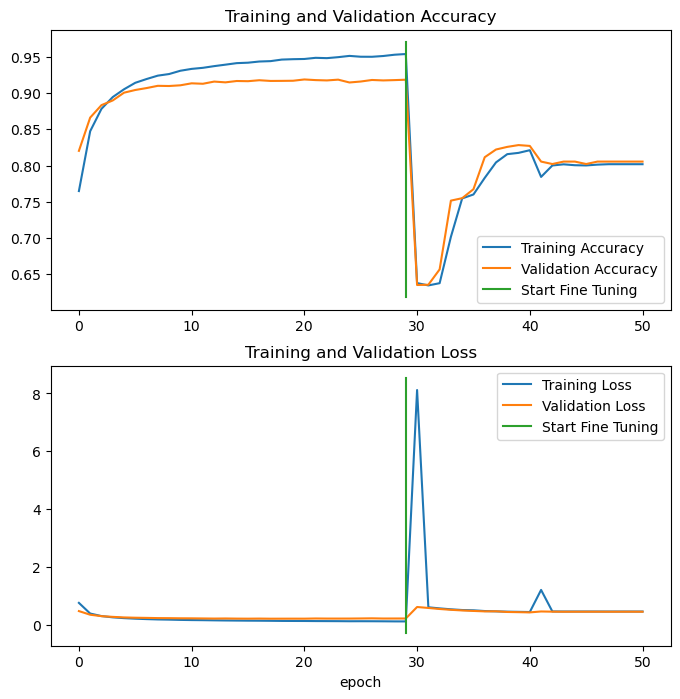

In [ ]:
compare_historys(history_model_1_1, history_model_1_1_fine, initial_epochs=30)

# Model 2: MobileNetV2 

In [ ]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
mobile_net.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = mobile_net(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,
                             activation=tf.keras.activations.sigmoid)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [ ]:
checkpoint_path = "./checkpoints/range3/MODEL_2/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
history_model_2 = model_2.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.7594 - precision: 0.6004 - recall: 0.5925
Epoch 1: saving model to ./checkpoints/range3/MODEL_2\checkpoint-1.ckpt
106/106 [==============================] - 213s 2s/step - loss: 0.5185 - accuracy: 0.7594 - precision: 0.6004 - recall: 0.5925 - val_loss: 0.4427 - val_accuracy: 0.8153 - val_precision: 0.7342 - val_recall: 0.6025
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8188 - precision: 0.7452 - recall: 0.6016
Epoch 2: saving model to ./checkpoints/range3/MODEL_2\checkpoint-2.ckpt
106/106 [==============================] - 222s 2s/step - loss: 0.4420 - accuracy: 0.8188 - precision: 0.7452 - recall: 0.6016 - val_loss: 0.4056 - val_accuracy: 0.8327 - val_precision: 0.7611 - val_recall: 0.6448
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.8314 - precision: 0.7666 - recall: 0.6296
Epoch 3: saving model to ./ch

# Model 3: VGG-16, Single Model Multiple Output

In [26]:
from tensorflow import keras 
import tensorflow as tf 

vgg_16_mult_out = keras.applications.VGG16(weights="imagenet",
                                           input_shape=(224, 224, 3), 
                                           include_top=False) 
vgg_16_mult_out.trainable = False 

In [27]:
inputs = keras.layers.Input(shape=(224, 224, 3)) 
# x = tf.cast(inputs, tf.float32)
# x = keras.layers.Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)
x = keras.applications.vgg16.preprocess_input(inputs) 
x = vgg_16_mult_out(x) 
x = keras.layers.GlobalAveragePooling2D()(x) 
initializer = keras.initializers.GlorotUniform(seed=42)
 
output_yaka = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax, name="YakaTipi")(x) 
output_cep = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax,name="CepOzelligi")(x) 
output_kol = keras.layers.Dense(1, activation=keras.activations.sigmoid, name="KolBoyuAciklama")(x) 

model_3 = keras.Model(inputs=inputs, outputs=[output_yaka, output_cep,output_kol], name="Ayd-Net") 

### Build Custom Batch Generator 

In [28]:
yaka_id = pd.Series(y_train.YakaTipi.value_counts().index).to_dict()  
cep_id = pd.Series(y_train.CepOzelligi.value_counts().index).to_dict()   
kolBoyu_id = pd.Series(y_train.KolBoyuAciklama.value_counts().index).to_dict()   

yaka_id = {v: k for k, v in yaka_id.items()}
cep_id = {v: k for k, v in cep_id.items()}
kolBoyu_id = {v: k for k, v in kolBoyu_id.items()}

kolBoyu_id

{'UZUN KOL': 0, 'KISA KOL': 1}

In [29]:
y_train['YakaTipi_id'] = y_train['YakaTipi'].map(yaka_id)
y_train['CepOzelligi_id'] = y_train['CepOzelligi'].map(cep_id)
y_train['KolBoyuAciklama_id'] = y_train['KolBoyuAciklama'].map(kolBoyu_id)

In [30]:
y_test['YakaTipi_id'] = y_test['YakaTipi'].map(yaka_id)
y_test['CepOzelligi_id'] = y_test['CepOzelligi'].map(cep_id)
y_test['KolBoyuAciklama_id'] = y_test['KolBoyuAciklama'].map(kolBoyu_id)

In [31]:
Xy_train = pd.concat([X_train, y_train], axis=1).drop(columns=["secenek", "ResimAdresi", "YakaTipi", "CepOzelligi", "KolBoyuAciklama"])
Xy_test = pd.concat([X_test, y_test], axis=1).drop(columns=["secenek", "ResimAdresi", "YakaTipi", "CepOzelligi", "KolBoyuAciklama"]) 
Xy_test.head()  


# Xy_train = pd.concat([X_train, y_train], axis=1).drop(columns=["secenek", "ResimAdresi"])
# Xy_test = pd.concat([X_test, y_test], axis=1).drop(columns=["secenek", "ResimAdresi"]) 
# Xy_train.head() 

,paths,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
2399,../data/range_3_images_AYD/test/2399.png,0,0,1
801,../data/range_3_images_AYD/test/801.png,0,0,0
2289,../data/range_3_images_AYD/test/2289.png,1,0,0
2345,../data/range_3_images_AYD/test/2345.png,0,0,0
3616,../data/range_3_images_AYD/test/3616.png,3,0,1


In [32]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'YakaTipi': 'categorical_crossentropy',
                    'CepOzelligi': 'categorical_crossentropy',
                    'KolBoyuAciklama': 'binary_crossentropy'
                }, 
                metrics={
                    'YakaTipi': [tf.keras.metrics.Precision(name="precision_yakaTipi"), tf.keras.metrics.Recall(name="recall_yakaTipi")],
                    'CepOzelligi': [tf.keras.metrics.Precision(name="precision_cep"), tf.keras.metrics.Recall(name="recall_cep")],
                    'KolBoyuAciklama': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 

In [33]:
checkpoint_path = "./checkpoints/range3/MODEL_3/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [34]:
from custom_data_generator import AydFashionDataGenerator
custom_data_gen = AydFashionDataGenerator(Xy_train, Xy_test) 

In [35]:
model_3_history = model_3.fit(custom_data_gen.generate_images(True, bathc_size=32, epoch=15), 
            steps_per_epoch=np.floor(len(Xy_train) / 32), 
            epochs=15, 
            validation_data=custom_data_gen.generate_images(False, bathc_size=32, epoch=15)  , 
            validation_steps=np.floor(len(Xy_test) / 32), 
            callbacks=[checkpoint_callback])

Epoch 1/15
105/105 [==============================] - ETA: 0s - loss: 5.0704 - YakaTipi_loss: 1.6825 - CepOzelligi_loss: 2.3301 - KolBoyuAciklama_loss: 1.0579 - YakaTipi_precision_yakaTipi: 0.5922 - YakaTipi_recall_yakaTipi: 0.5485 - CepOzelligi_precision_cep: 0.6004 - CepOzelligi_recall_cep: 0.5786 - KolBoyuAciklama_precision_kol: 0.3032 - KolBoyuAciklama_recall_kol: 0.2930
Epoch 1: saving model to ./checkpoints/range3/MODEL_3\checkpoint-1.ckpt
105/105 [==============================] - 461s 4s/step - loss: 5.0704 - YakaTipi_loss: 1.6825 - CepOzelligi_loss: 2.3301 - KolBoyuAciklama_loss: 1.0579 - YakaTipi_precision_yakaTipi: 0.5922 - YakaTipi_recall_yakaTipi: 0.5485 - CepOzelligi_precision_cep: 0.6004 - CepOzelligi_recall_cep: 0.5786 - KolBoyuAciklama_precision_kol: 0.3032 - KolBoyuAciklama_recall_kol: 0.2930 - val_loss: 2.9074 - val_YakaTipi_loss: 1.0220 - val_CepOzelligi_loss: 1.3154 - val_KolBoyuAciklama_loss: 0.5700 - val_YakaTipi_precision_yakaTipi: 0.6925 - val_YakaTipi_recall_y

In [36]:
model_3.save("../trained_models/model_3.h5")

In [49]:
from multioutput_eval import MultiOutputModelTester
tester_vgg = MultiOutputModelTester(model=model_3, y_test=y_test.iloc[:, 3:], paths=X_test["paths"].to_list()[:]) 

100 th iteration. You have 1128 inputs. 
200 th iteration. You have 1128 inputs. 
300 th iteration. You have 1128 inputs. 
400 th iteration. You have 1128 inputs. 
500 th iteration. You have 1128 inputs. 
600 th iteration. You have 1128 inputs. 
700 th iteration. You have 1128 inputs. 
800 th iteration. You have 1128 inputs. 
900 th iteration. You have 1128 inputs. 
1000 th iteration. You have 1128 inputs. 
1100 th iteration. You have 1128 inputs. 


In [50]:
pd.DataFrame(tester_vgg.get_metrics())

,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.8546,0.8116,0.9278
recall_weighted,0.8564,0.8103,0.9273
f1_score_weighted,0.8526,0.8103,0.9275


In [103]:
from multioutput_eval import MultiOutputModelTester
tester_vgg = MultiOutputModelTester(model=model_3, y_test=y_train.iloc[:, 3:], paths=X_train["paths"].to_list()[:]) 
pd.DataFrame(tester_vgg.get_metrics())

100 th iteration. You have 3390 inputs. 
200 th iteration. You have 3390 inputs. 
300 th iteration. You have 3390 inputs. 
400 th iteration. You have 3390 inputs. 
500 th iteration. You have 3390 inputs. 
600 th iteration. You have 3390 inputs. 
700 th iteration. You have 3390 inputs. 
800 th iteration. You have 3390 inputs. 
900 th iteration. You have 3390 inputs. 
1000 th iteration. You have 3390 inputs. 
1100 th iteration. You have 3390 inputs. 
1200 th iteration. You have 3390 inputs. 
1300 th iteration. You have 3390 inputs. 
1400 th iteration. You have 3390 inputs. 
1500 th iteration. You have 3390 inputs. 
1600 th iteration. You have 3390 inputs. 
1700 th iteration. You have 3390 inputs. 
1800 th iteration. You have 3390 inputs. 
1900 th iteration. You have 3390 inputs. 
2000 th iteration. You have 3390 inputs. 
2100 th iteration. You have 3390 inputs. 
2200 th iteration. You have 3390 inputs. 
2300 th iteration. You have 3390 inputs. 
2400 th iteration. You have 3390 inputs. 
2

,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9232,0.8992,0.9627
recall_weighted,0.9218,0.8976,0.9628
f1_score_weighted,0.9200,0.8972,0.9627


In [55]:
pd.DataFrame(model_3_history.history)[["loss", "YakaTipi_loss", "CepOzelligi_loss", "KolBoyuAciklama_loss", "val_loss", "val_YakaTipi_loss", "val_CepOzelligi_loss", "val_KolBoyuAciklama_loss"]]

,loss,YakaTipi_loss,CepOzelligi_loss,KolBoyuAciklama_loss,val_loss,val_YakaTipi_loss,val_CepOzelligi_loss,val_KolBoyuAciklama_loss
0,5.070397,1.682487,2.330054,1.057856,2.907437,1.022040,1.315410,0.569987
1,2.331837,0.864213,1.025543,0.442082,2.011942,0.740257,0.885708,0.385977
2,1.694022,0.637910,0.743306,0.312807,1.682170,0.633975,0.739647,0.308548
3,1.387275,0.517488,0.620530,0.249257,1.506346,0.571177,0.668484,0.266685
4,1.203351,0.449356,0.544377,0.209618,1.398601,0.536781,0.620068,0.241752
5,1.075271,0.400437,0.488724,0.186110,1.339367,0.513017,0.601026,0.225324
6,0.987164,0.367507,0.449987,0.169669,1.282288,0.488155,0.579661,0.214472
7,0.906863,0.335568,0.416542,0.154752,1.238347,0.468066,0.563261,0.207020
8,0.855446,0.317665,0.393131,0.144650,1.206492,0.452396,0.552562,0.201534
9,0.806963,0.297809,0.371575,0.137580,1.181498,0.438101,0.547732,0.195665


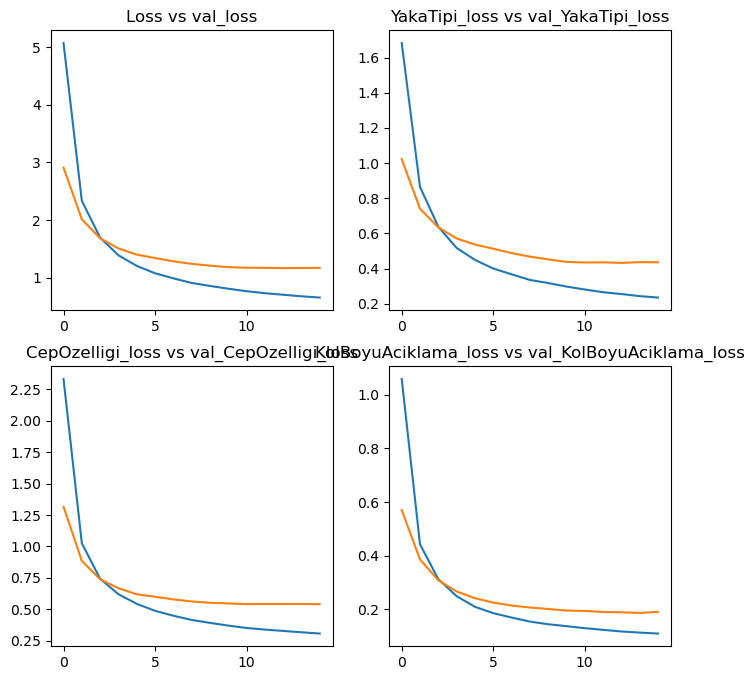

In [75]:
from matplotlib import pyplot as plt 

def eval_mult_loss(history):
    figure, axis = plt.subplots(2, 2, figsize=(8,8))
    
    axis[0,0].set_title("Loss vs val_loss")
    axis[0,0].plot(pd.DataFrame(history)[["loss", "val_loss"]])  
    
    axis[0,1].set_title("YakaTipi_loss vs val_YakaTipi_loss")
    axis[0,1].plot(pd.DataFrame(history)[["YakaTipi_loss", "val_YakaTipi_loss"]]) 
    
    axis[1,0].set_title("CepOzelligi_loss vs val_CepOzelligi_loss")
    axis[1,0].plot(pd.DataFrame(history)[["CepOzelligi_loss", "val_CepOzelligi_loss"]]) 
    
    axis[1,1].set_title("KolBoyuAciklama_loss vs val_KolBoyuAciklama_loss")
    axis[1,1].plot(pd.DataFrame(history)[["KolBoyuAciklama_loss", "val_KolBoyuAciklama_loss"]]) 

    plt.show() 

eval_mult_loss(model_3_history.history)

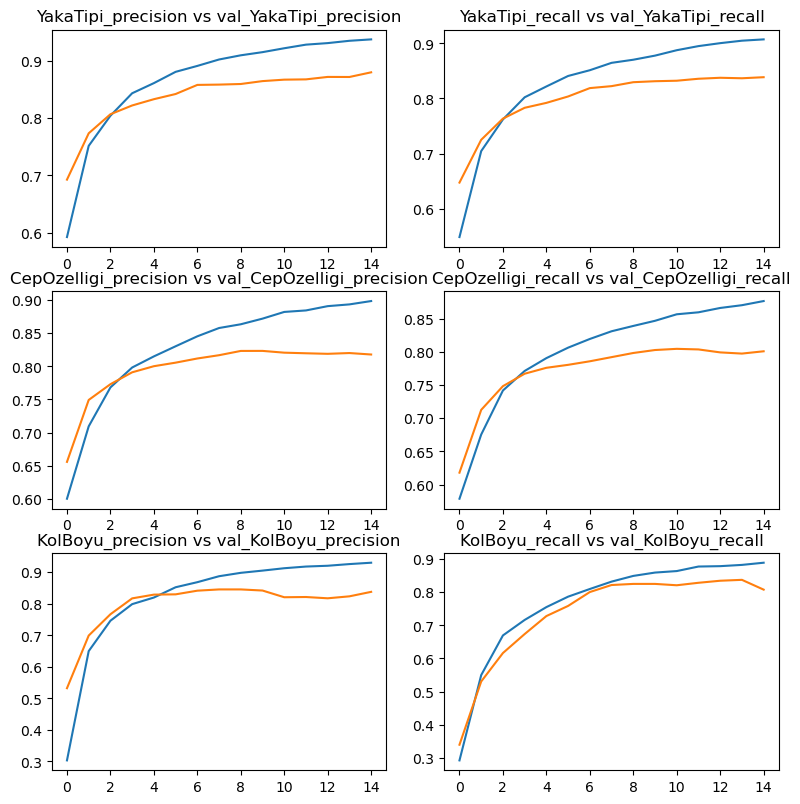

In [74]:
def eval_mult_precisionRecall(history):
    figure, axis = plt.subplots(3, 2, figsize=(8,8))
    figure.tight_layout()
    axis[0,0].set_title("YakaTipi_precision vs val_YakaTipi_precision")
    axis[0,0].plot(pd.DataFrame(history)[["YakaTipi_precision_yakaTipi", "val_YakaTipi_precision_yakaTipi"]])  
    
    axis[0,1].set_title("YakaTipi_recall vs val_YakaTipi_recall")
    axis[0,1].plot(pd.DataFrame(history)[["YakaTipi_recall_yakaTipi", 'val_YakaTipi_recall_yakaTipi']]) 
    
    axis[1,0].set_title("CepOzelligi_precision vs val_CepOzelligi_precision")
    axis[1,0].plot(pd.DataFrame(history)[['CepOzelligi_precision_cep', 'val_CepOzelligi_precision_cep']]) 
    
    axis[1,1].set_title("CepOzelligi_recall vs val_CepOzelligi_recall")
    axis[1,1].plot(pd.DataFrame(history)[['CepOzelligi_recall_cep', 'val_CepOzelligi_recall_cep']]) 

    axis[2,0].set_title("KolBoyu_precision vs val_KolBoyu_precision")
    axis[2,0].plot(pd.DataFrame(history)[['KolBoyuAciklama_precision_kol', 'val_KolBoyuAciklama_precision_kol']]) 

    axis[2,1].set_title("KolBoyu_recall vs val_KolBoyu_recall")
    axis[2,1].plot(pd.DataFrame(history)[['KolBoyuAciklama_recall_kol', 'val_KolBoyuAciklama_recall_kol']]) 


    plt.show()

eval_mult_precisionRecall(model_3_history.history)

## Model 3.1: VGG-16 Increase Complexity

In [126]:
vgg_16_mult_out = keras.applications.VGG16(weights="imagenet",
                                           input_shape=(224, 224, 3), 
                                           include_top=False) 
vgg_16_mult_out.trainable = False 
inputs = keras.layers.Input(shape=(224, 224, 3)) 
x = keras.applications.vgg16.preprocess_input(inputs) 
x = vgg_16_mult_out(x) 
x = keras.layers.GlobalAveragePooling2D()(x) 
x = keras.layers.Dropout(0.50)(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(16, activation="relu")(x)
initializer = keras.initializers.GlorotUniform(seed=42)
output_yaka = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax, name="YakaTipi")(x) 
output_cep = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax,name="CepOzelligi")(x) 
output_kol = keras.layers.Dense(1, activation=keras.activations.sigmoid, name="KolBoyuAciklama")(x) 

model_3_1 = keras.Model(inputs=inputs, outputs=[output_yaka, output_cep,output_kol], name="Ayd-Net") 

In [127]:
from custom_data_generator import AydFashionDataGenerator
train_custom_gen_epoch_15 = custom_data_gen.generate_images(True, bathc_size=32, epoch=21)
val_custom_gen_epoch_15 = custom_data_gen.generate_images(False, bathc_size=32, epoch=21)

In [128]:
model_3_1.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'YakaTipi': 'categorical_crossentropy',
                    'CepOzelligi': 'categorical_crossentropy',
                    'KolBoyuAciklama': 'binary_crossentropy'
                }, 
                metrics={
                    'YakaTipi': [tf.keras.metrics.Precision(name="precision_yakaTipi"), tf.keras.metrics.Recall(name="recall_yakaTipi")],
                    'CepOzelligi': [tf.keras.metrics.Precision(name="precision_cep"), tf.keras.metrics.Recall(name="recall_cep")],
                    'KolBoyuAciklama': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 
checkpoint_path = "./checkpoints/range3/MODEL_3_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 
model_3_1_history = model_3_1.fit(train_custom_gen_epoch_15, 
            steps_per_epoch=np.floor(len(Xy_train) / 32), 
            epochs=20, 
            validation_data=val_custom_gen_epoch_15, 
            validation_steps=np.floor(len(Xy_test) / 32), 
            callbacks=[checkpoint_callback])

Epoch 1/20
 25/105 [======>.......................] - ETA: 4:43 - loss: 7.5517 - YakaTipi_loss: 2.9544 - CepOzelligi_loss: 2.8281 - KolBoyuAciklama_loss: 1.7692 - YakaTipi_precision_yakaTipi: 0.3671 - YakaTipi_recall_yakaTipi: 0.2988 - CepOzelligi_precision_cep: 0.3824 - CepOzelligi_recall_cep: 0.3375 - KolBoyuAciklama_precision_kol: 0.3039 - KolBoyuAciklama_recall_kol: 0.1469

In [ ]:
eval_mult_loss(model_3_1_history.history)

In [ ]:
eval_mult_precisionRecall(model_3_1_history.history)

In [111]:
pd.DataFrame(model_3_1_history.history)

,loss,YakaTipi_loss,CepOzelligi_loss,KolBoyuAciklama_loss,YakaTipi_precision_yakaTipi,YakaTipi_recall_yakaTipi,CepOzelligi_precision_cep,CepOzelligi_recall_cep,KolBoyuAciklama_precision_kol,KolBoyuAciklama_recall_kol,val_loss,val_YakaTipi_loss,val_CepOzelligi_loss,val_KolBoyuAciklama_loss,val_YakaTipi_precision_yakaTipi,val_YakaTipi_recall_yakaTipi,val_CepOzelligi_precision_cep,val_CepOzelligi_recall_cep,val_KolBoyuAciklama_precision_kol,val_KolBoyuAciklama_recall_kol
0,3.308833,1.343873,1.292796,0.672165,0.000000,0.000000,0.000000,0.000000,0.264706,0.117188,3.143176,1.308836,1.188441,0.645900,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,3.044935,1.297338,1.120185,0.627412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.925733,1.273078,1.045932,0.606724,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,2.877496,1.275178,1.007559,0.594758,0.000000,0.000000,0.721354,0.164881,0.000000,0.000000,2.790749,1.255507,0.956768,0.578474,0.000000,0.000000,0.745536,0.745536,0.0,0.0
3,2.776740,1.263614,0.940158,0.572967,0.000000,0.000000,0.736012,0.736012,0.000000,0.000000,2.713946,1.251106,0.903989,0.558851,0.000000,0.000000,0.745536,0.745536,0.0,0.0
4,2.721111,1.260727,0.903752,0.556633,0.000000,0.000000,0.735417,0.735417,0.000000,0.000000,2.665555,1.246812,0.872190,0.546554,0.000000,0.000000,0.747321,0.747321,0.0,0.0
5,2.689845,1.259510,0.882409,0.547926,0.000000,0.000000,0.736607,0.736607,0.000000,0.000000,2.647814,1.246996,0.864018,0.536800,0.000000,0.000000,0.743750,0.743750,0.0,0.0
6,2.678299,1.259913,0.875281,0.543105,0.000000,0.000000,0.735417,0.735417,0.000000,0.000000,2.635161,1.247162,0.855393,0.532606,0.000000,0.000000,0.744643,0.744643,0.0,0.0
7,2.669848,1.259900,0.869977,0.539971,0.000000,0.000000,0.736012,0.736012,0.000000,0.000000,2.627383,1.248121,0.848673,0.530589,0.000000,0.000000,0.746429,0.746429,0.0,0.0
8,2.645642,1.252486,0.862015,0.531141,0.000000,0.000000,0.736310,0.736310,0.000000,0.000000,2.585217,1.230657,0.837660,0.516900,0.000000,0.000000,0.746429,0.746429,0.0,0.0
9,2.609212,1.235844,0.850787,0.522581,0.720588,0.029167,0.736012,0.736012,0.000000,0.000000,2.547230,1.211542,0.825275,0.510413,0.785203,0.293750,0.746429,0.746429,0.0,0.0


# Model 4: Multi output Efficient Net

In [40]:
eff_net = tf.keras.applications.EfficientNetB0(include_top=False) 
eff_net.trainable = False 

In [41]:
inputs = keras.layers.Input(shape=(224, 224, 3))  
x = eff_net(inputs) 
x = keras.layers.GlobalAveragePooling2D()(x) 
initializer = keras.initializers.GlorotUniform(seed=42)
 
output_yaka = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax, name="YakaTipi")(x) 
output_cep = keras.layers.Dense(4, kernel_initializer=initializer, activation=keras.activations.softmax,name="CepOzelligi")(x) 
output_kol = keras.layers.Dense(1, activation=keras.activations.sigmoid, name="KolBoyuAciklama")(x) 

model_4 = keras.Model(inputs=inputs, outputs=[output_yaka, output_cep,output_kol], name="Ayd-Net-Eff") 

In [42]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'YakaTipi': 'categorical_crossentropy',
                    'CepOzelligi': 'categorical_crossentropy',
                    'KolBoyuAciklama': 'binary_crossentropy'
                }, 
                metrics={
                    'YakaTipi': [tf.keras.metrics.Precision(name="precision_yakaTipi"), tf.keras.metrics.Recall(name="recall_yakaTipi")],
                    'CepOzelligi': [tf.keras.metrics.Precision(name="precision_cep"), tf.keras.metrics.Recall(name="recall_cep")],
                    'KolBoyuAciklama': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 

In [43]:
checkpoint_path = "./checkpoints/range3/MODEL_4/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [44]:
model_4_history = model_4.fit(custom_data_gen.generate_images(True, bathc_size=32, epoch=15), 
            steps_per_epoch=np.floor(len(Xy_train) / 32), 
            epochs=15, 
            validation_data=custom_data_gen.generate_images(False, bathc_size=32, epoch=15), 
            validation_steps=np.floor(len(Xy_test) / 32), 
            callbacks=[checkpoint_callback])

Epoch 1/15
105/105 [==============================] - ETA: 0s - loss: 1.8637 - YakaTipi_loss: 0.7777 - CepOzelligi_loss: 0.7091 - KolBoyuAciklama_loss: 0.3768 - YakaTipi_precision_yakaTipi: 0.8344 - YakaTipi_recall_yakaTipi: 0.5577 - CepOzelligi_precision_cep: 0.7764 - CepOzelligi_recall_cep: 0.7080 - KolBoyuAciklama_precision_kol: 0.8077 - KolBoyuAciklama_recall_kol: 0.3281
Epoch 1: saving model to ./checkpoints/range3/MODEL_4\checkpoint-1.ckpt
105/105 [==============================] - 185s 2s/step - loss: 1.8637 - YakaTipi_loss: 0.7777 - CepOzelligi_loss: 0.7091 - KolBoyuAciklama_loss: 0.3768 - YakaTipi_precision_yakaTipi: 0.8344 - YakaTipi_recall_yakaTipi: 0.5577 - CepOzelligi_precision_cep: 0.7764 - CepOzelligi_recall_cep: 0.7080 - KolBoyuAciklama_precision_kol: 0.8077 - KolBoyuAciklama_recall_kol: 0.3281 - val_loss: 1.3542 - val_YakaTipi_loss: 0.5390 - val_CepOzelligi_loss: 0.5577 - val_KolBoyuAciklama_loss: 0.2575 - val_YakaTipi_precision_yakaTipi: 0.9065 - val_YakaTipi_recall_y

In [45]:
model_4.save("../trained_models/model_4.h5")

In [ ]:
tester = MultiOutputModelTester(model=model_4, y_test=y_test.iloc[:, 3:], paths=X_test["paths"].to_list()) 
tester.get_metrics()

In [47]:
pd.DataFrame(tester.get_metrics())

,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9159,0.8623,0.9552
recall_weighted,0.9158,0.8670,0.9557
f1_score_weighted,0.9153,0.8631,0.9553


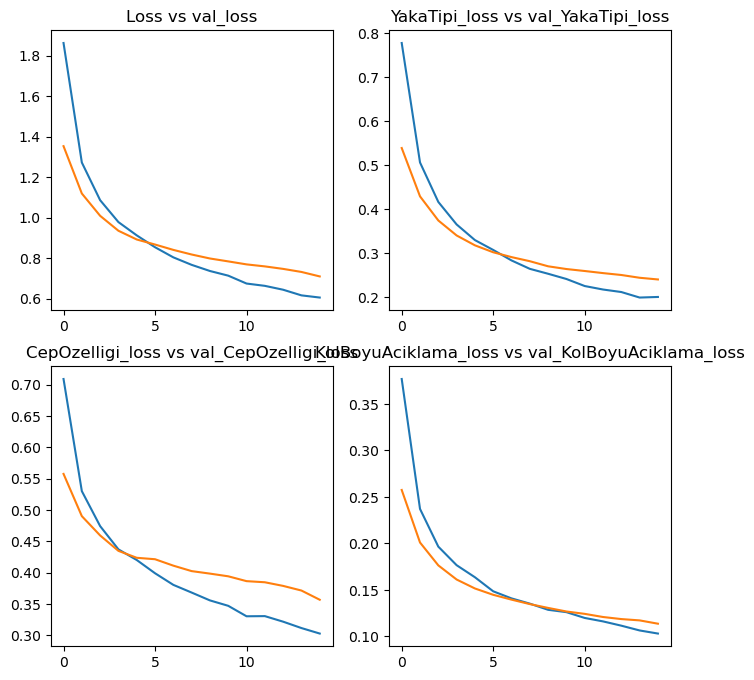

In [77]:
eval_mult_loss(model_4_history.history)

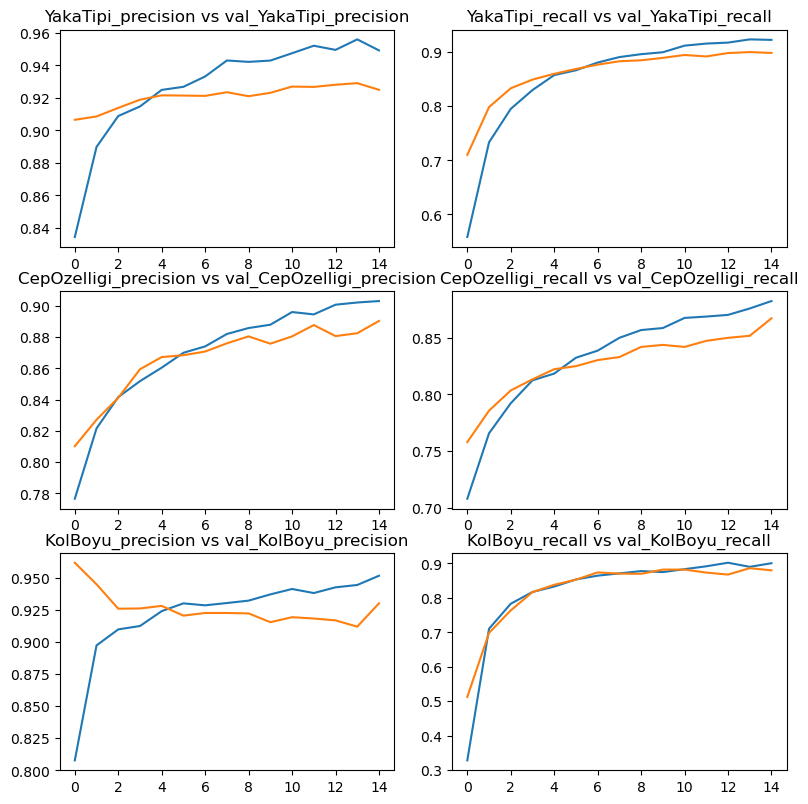

In [78]:
eval_mult_precisionRecall(model_4_history.history)

In [79]:
batches = custom_data_gen.generate_images(False, bathc_size=32, epoch=15)
batch = next(batches)
one_bathc_inputs= batch[0]
one_bathc_outputs = batch[1] 

In [80]:
def get_labels_as_array_from_batch(outputs: dict, i_th: int):
    res = [] 
    for k,v in outputs.items():
        r = v[i_th] 
        if isinstance(r, np.ndarray) != True: 
            zeros = np.zeros((2), dtype="int")
            zeros[r] = 1 
            r = zeros 
        
        res.append(r)
    
    return res

In [82]:
yaka_id = {v: k for k, v in yaka_id.items()}
cep_id = {v: k for k, v in cep_id.items()}
kolBoyu_id = {v: k for k, v in kolBoyu_id.items()}
classes = dict() 
classes["YakaTipi_id"] = yaka_id 
classes["CepOzelligi_id"] = cep_id 
classes["KolBoyuAciklama_id"] = kolBoyu_id 

1/1 [==============================] - 0s 455ms/step


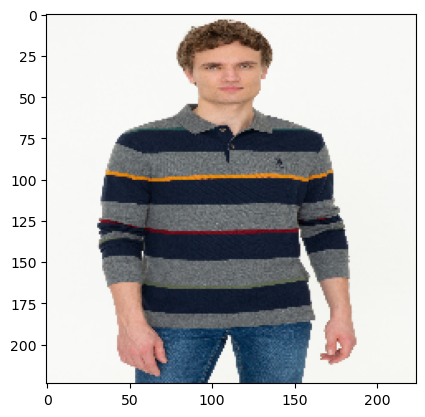

,classes,preds,actuals
0,DÜĞMELI YAKA,0,0.0
1,BISIKLET YAKA,0,0.0
2,KAPIŞONLU,0,0.0
3,POLO YAKA,1,1.0
0,CEPSIZ,1,1.0
1,TEK CEP,0,0.0
2,ÇIFT CEP,0,0.0
3,KANGURU CEP,0,0.0
0,UZUN KOL,1,1.0
1,KISA KOL,0,0.0


In [90]:
from multioutput_eval import custom_predict
custom_predict(model_4, one_bathc_inputs[19], get_labels_as_array_from_batch(one_bathc_outputs, 19), classes=classes)

## Model 4.1 Fine Tune 

In [91]:
for layer in model_4.layers: 
  print(layer.trainable)

True
False
True
True
True
True


In [92]:
eff_net.trainable = True 

for layer in eff_net.layers[:-15]:
  layer.trainable = False 

model_4.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'YakaTipi': 'categorical_crossentropy',
                    'CepOzelligi': 'categorical_crossentropy',
                    'KolBoyuAciklama': 'binary_crossentropy'
                }, 
                metrics={
                    'YakaTipi': [tf.keras.metrics.Precision(name="precision_yakaTipi"), tf.keras.metrics.Recall(name="recall_yakaTipi")],
                    'CepOzelligi': [tf.keras.metrics.Precision(name="precision_cep"), tf.keras.metrics.Recall(name="recall_cep")],
                    'KolBoyuAciklama': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 


In [93]:
# Fine tune for another 5 epochs
fine_tune_epochs = 15 + 5

history_model_4_fine = model_4.fit(custom_data_gen.generate_images(True, bathc_size=32, epoch=6), 
            steps_per_epoch=np.floor(len(Xy_train) / 32), 
            epochs=fine_tune_epochs, 
            validation_data=custom_data_gen.generate_images(False, bathc_size=32, epoch=6), 
            initial_epoch= model_4_history.epoch[-1], # start from previous last epoch
            validation_steps=np.floor(len(Xy_test) / 32), 
            callbacks=[checkpoint_callback])

Epoch 15/20
105/105 [==============================] - ETA: 0s - loss: 0.9488 - YakaTipi_loss: 0.3340 - CepOzelligi_loss: 0.4531 - KolBoyuAciklama_loss: 0.1617 - YakaTipi_precision_yakaTipi: 0.8935 - YakaTipi_recall_yakaTipi: 0.8661 - CepOzelligi_precision_cep: 0.8461 - CepOzelligi_recall_cep: 0.8182 - KolBoyuAciklama_precision_kol: 0.8711 - KolBoyuAciklama_recall_kol: 0.8451
Epoch 15: saving model to ./checkpoints/range3/MODEL_4\checkpoint-15.ckpt
105/105 [==============================] - 359s 3s/step - loss: 0.9488 - YakaTipi_loss: 0.3340 - CepOzelligi_loss: 0.4531 - KolBoyuAciklama_loss: 0.1617 - YakaTipi_precision_yakaTipi: 0.8935 - YakaTipi_recall_yakaTipi: 0.8661 - CepOzelligi_precision_cep: 0.8461 - CepOzelligi_recall_cep: 0.8182 - KolBoyuAciklama_precision_kol: 0.8711 - KolBoyuAciklama_recall_kol: 0.8451 - val_loss: 0.7653 - val_YakaTipi_loss: 0.2446 - val_CepOzelligi_loss: 0.4231 - val_KolBoyuAciklama_loss: 0.0976 - val_YakaTipi_precision_yakaTipi: 0.9214 - val_YakaTipi_recal

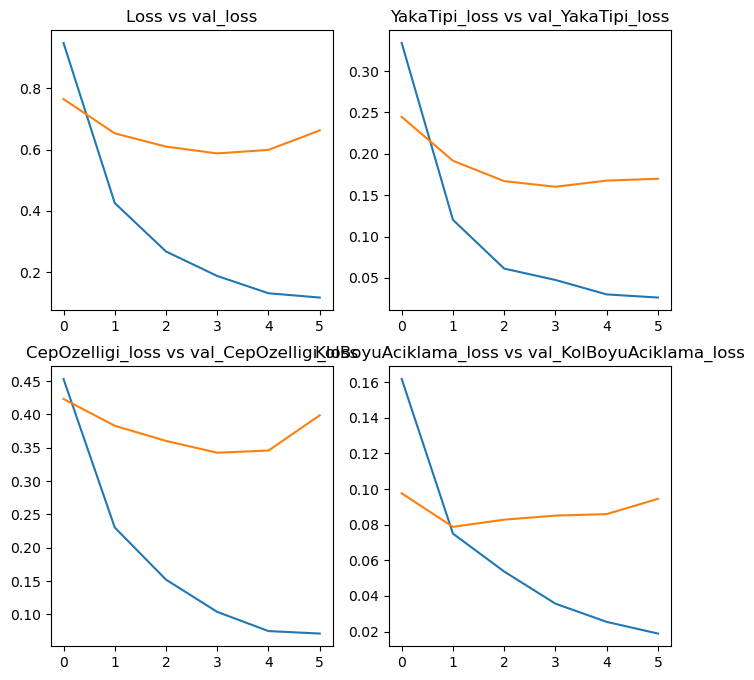

In [95]:
eval_mult_loss(history_model_4_fine.history)

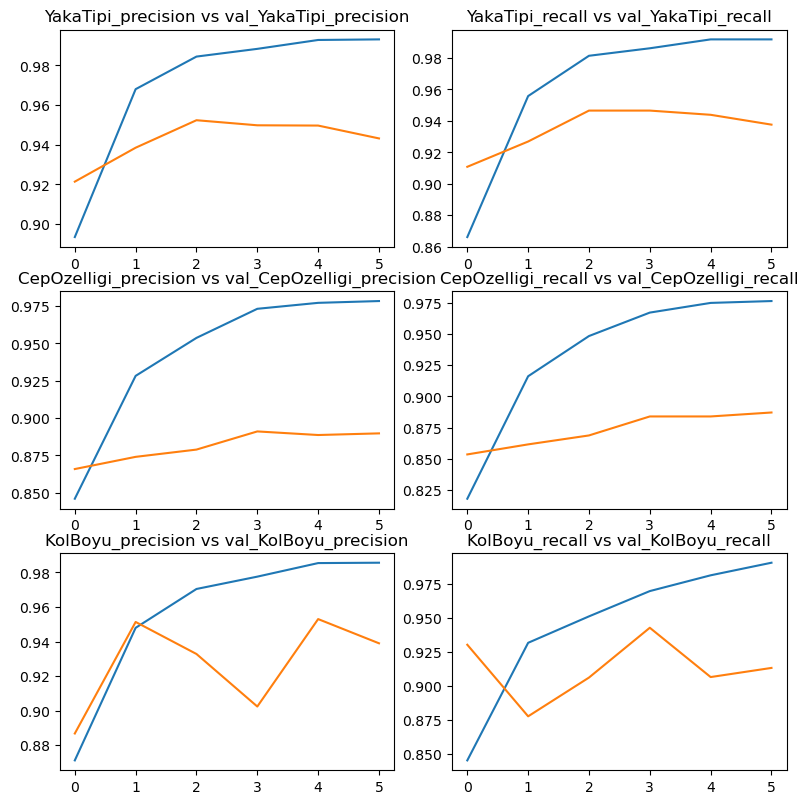

In [96]:
eval_mult_precisionRecall(history_model_4_fine.history)

In [97]:
tester = MultiOutputModelTester(model=model_4, y_test=y_test.iloc[:, 3:], paths=X_test["paths"].to_list()) 
pd.DataFrame(tester.get_metrics())

100 th iteration. You have 1128 inputs. 
200 th iteration. You have 1128 inputs. 
300 th iteration. You have 1128 inputs. 
400 th iteration. You have 1128 inputs. 
500 th iteration. You have 1128 inputs. 
600 th iteration. You have 1128 inputs. 
700 th iteration. You have 1128 inputs. 
800 th iteration. You have 1128 inputs. 
900 th iteration. You have 1128 inputs. 
1000 th iteration. You have 1128 inputs. 
1100 th iteration. You have 1128 inputs. 


,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9432,0.8892,0.9688
recall_weighted,0.9424,0.8901,0.9690
f1_score_weighted,0.9424,0.8878,0.9689


In [98]:
tester = MultiOutputModelTester(model=model_4, y_test=y_train.iloc[:, 3:], paths=X_train["paths"].to_list()) 
pd.DataFrame(tester.get_metrics())

100 th iteration. You have 3390 inputs. 
200 th iteration. You have 3390 inputs. 
300 th iteration. You have 3390 inputs. 
400 th iteration. You have 3390 inputs. 
500 th iteration. You have 3390 inputs. 
600 th iteration. You have 3390 inputs. 
700 th iteration. You have 3390 inputs. 
800 th iteration. You have 3390 inputs. 
900 th iteration. You have 3390 inputs. 
1000 th iteration. You have 3390 inputs. 
1100 th iteration. You have 3390 inputs. 
1200 th iteration. You have 3390 inputs. 
1300 th iteration. You have 3390 inputs. 
1400 th iteration. You have 3390 inputs. 
1500 th iteration. You have 3390 inputs. 
1600 th iteration. You have 3390 inputs. 
1700 th iteration. You have 3390 inputs. 
1800 th iteration. You have 3390 inputs. 
1900 th iteration. You have 3390 inputs. 
2000 th iteration. You have 3390 inputs. 
2100 th iteration. You have 3390 inputs. 
2200 th iteration. You have 3390 inputs. 
2300 th iteration. You have 3390 inputs. 
2400 th iteration. You have 3390 inputs. 
2

,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9953,0.9942,0.9985
recall_weighted,0.9953,0.9941,0.9985
f1_score_weighted,0.9953,0.9941,0.9985


In [100]:
m4_epoch_15 = tf.keras.models.load_model("../trained_models/model_4.h5") 

In [101]:
tester = MultiOutputModelTester(model=m4_epoch_15, y_test=y_train.iloc[:, 3:], paths=X_train["paths"].to_list()) 
pd.DataFrame(tester.get_metrics())

100 th iteration. You have 3390 inputs. 
200 th iteration. You have 3390 inputs. 
300 th iteration. You have 3390 inputs. 
400 th iteration. You have 3390 inputs. 
500 th iteration. You have 3390 inputs. 
600 th iteration. You have 3390 inputs. 
700 th iteration. You have 3390 inputs. 
800 th iteration. You have 3390 inputs. 
900 th iteration. You have 3390 inputs. 
1000 th iteration. You have 3390 inputs. 
1100 th iteration. You have 3390 inputs. 
1200 th iteration. You have 3390 inputs. 
1300 th iteration. You have 3390 inputs. 
1400 th iteration. You have 3390 inputs. 
1500 th iteration. You have 3390 inputs. 
1600 th iteration. You have 3390 inputs. 
1700 th iteration. You have 3390 inputs. 
1800 th iteration. You have 3390 inputs. 
1900 th iteration. You have 3390 inputs. 
2000 th iteration. You have 3390 inputs. 
2100 th iteration. You have 3390 inputs. 
2200 th iteration. You have 3390 inputs. 
2300 th iteration. You have 3390 inputs. 
2400 th iteration. You have 3390 inputs. 
2

,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9490,0.9140,0.9718
recall_weighted,0.9478,0.9156,0.9720
f1_score_weighted,0.9475,0.9139,0.9718


In [102]:
tester = MultiOutputModelTester(model=m4_epoch_15, y_test=y_test.iloc[:, 3:], paths=X_test["paths"].to_list()) 
pd.DataFrame(tester.get_metrics())

100 th iteration. You have 1128 inputs. 
200 th iteration. You have 1128 inputs. 
300 th iteration. You have 1128 inputs. 
400 th iteration. You have 1128 inputs. 
500 th iteration. You have 1128 inputs. 
600 th iteration. You have 1128 inputs. 
700 th iteration. You have 1128 inputs. 
800 th iteration. You have 1128 inputs. 
900 th iteration. You have 1128 inputs. 
1000 th iteration. You have 1128 inputs. 
1100 th iteration. You have 1128 inputs. 


,YakaTipi_id,CepOzelligi_id,KolBoyuAciklama_id
threshold,0.5000,0.5000,0.5000
precision_weighted,0.9159,0.8623,0.9552
recall_weighted,0.9158,0.8670,0.9557
f1_score_weighted,0.9153,0.8631,0.9553
